<div class="text-primary">
    <div class="text-center">
        <div class="h1">practise 4 - clustering</div>
        <div class="h5">maktabkhooneh</div>
    </div>
    <div class="h4">Name: Amir Mohammad Arghavany</div>
    <div class="h4">Email: amir.arghavoon@gmail.com</div>
</div>

# import

In [1]:
# base packages
import numpy as np
import pandas as pd
# preprocessing packages
from sklearn.preprocessing import LabelEncoder, StandardScaler
# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
# learning packages
from sklearn.cluster import KMeans, DBSCAN
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
df = pd.read_csv('D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\Q4\Mall_Customers.csv')

# preprocessing

In [3]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
132,133,Female,25,72,34
60,61,Male,70,46,56
141,142,Male,32,75,93
120,121,Male,27,67,56
135,136,Female,29,73,88


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# drop unusefull data -> CustomerID
df.drop('CustomerID', axis=1, inplace=True)

In [9]:
# categorical to numerical -> Gender
LE = LabelEncoder()
print('before:', df['Gender'].unique())
df['Gender'] = LE.fit_transform(df['Gender'])
print('after:', df['Gender'].unique())

before: ['Male' 'Female']
after: [1 0]


# visualization

<div class="h3 text-success">By Age</div>

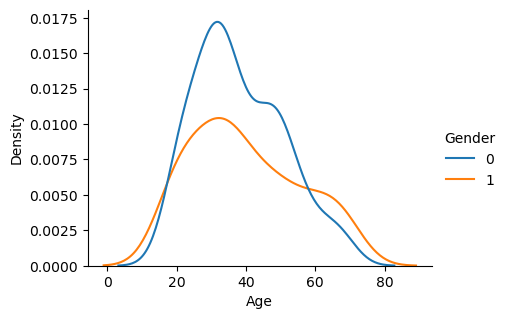

In [10]:
sns.displot(df, x='Age', hue='Gender', kind='kde').figure.set_size_inches(5, 3)

<div class="h3 text-success">By Annual Income (k$)</div>

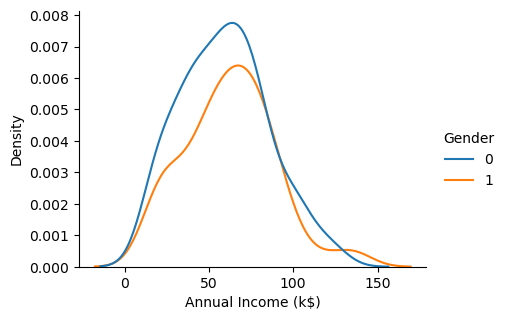

In [11]:
sns.displot(df, x='Annual Income (k$)', hue='Gender', kind='kde').figure.set_size_inches(5, 3)

<div class="h3 text-success">By Spending Score (1-100)</div>

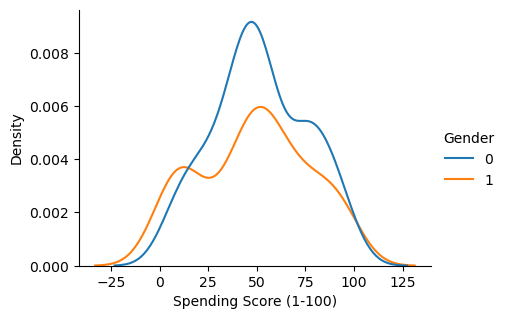

In [12]:
sns.displot(df, x='Spending Score (1-100)', hue='Gender', kind='kde').figure.set_size_inches(5, 3)

<div class="h3 text-success">Scatter by all</div>

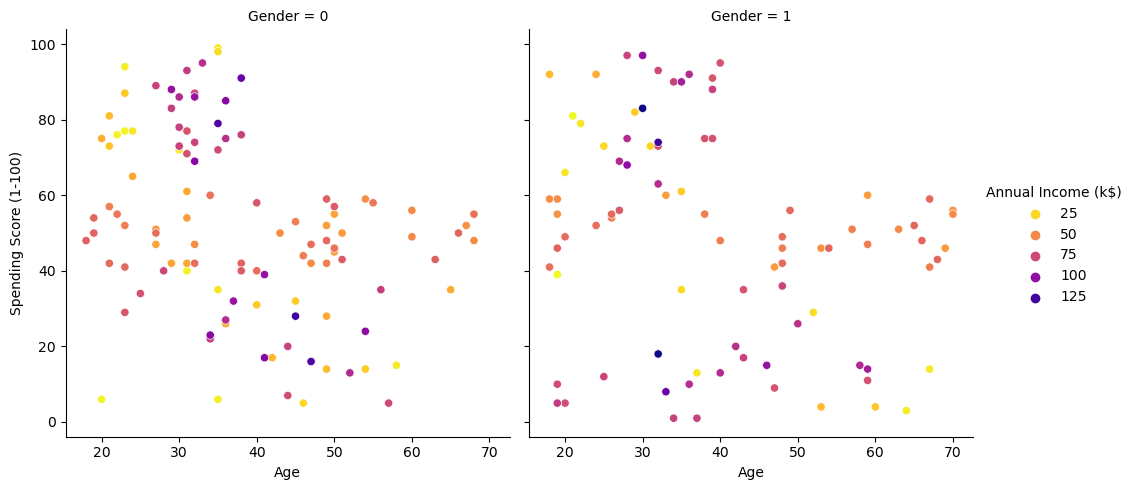

In [13]:
palette = sns.color_palette("plasma_r", as_cmap=True)
sns.relplot(x='Age', y='Spending Score (1-100)', data=df, col='Gender', hue='Annual Income (k$)', palette=palette)   

# scaling

In [14]:
SS = StandardScaler()
df = pd.DataFrame(SS.fit_transform(df), columns=df.columns)

# ML - clustering

<div class="h2 text-success text-center">KMeans</div>

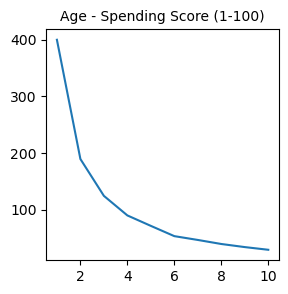

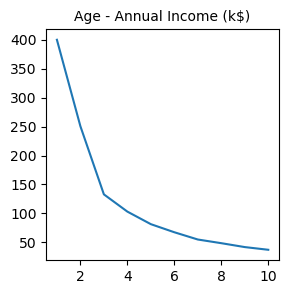

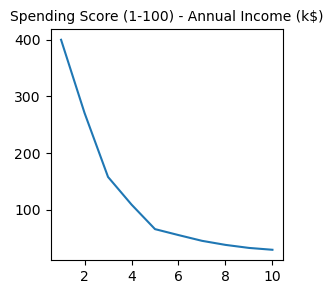

In [15]:
cluster_features = [
    ['Age', 'Spending Score (1-100)'],
    ['Age', 'Annual Income (k$)'],
    ['Spending Score (1-100)', 'Annual Income (k$)'],
]
for cf in cluster_features:
    wcss = []
    X = df[cf].values
    for i in range(1, 11):
        KM = KMeans(n_clusters=i, init='k-means++', random_state=42)
        KM.fit(X)
        wcss.append(KM.inertia_)
    plt.figure(figsize=(3, 3))
    plt.plot(range(1, 11), wcss)
    plt.title('{} - {}'.format(cf[0], cf[1]), fontsize=10)
plt.show()

In [16]:
cluster_n = [6, 5, 5]

In [17]:
y_KM = []
KM_center = []
for i in range(len(cluster_features)):
    X = df[cluster_features[i]].values
    KM = KMeans(n_clusters=cluster_n[i], init='k-means++', random_state=42)
    y_KM.append(KM.fit_predict(X))
    KM_center.append(KM.cluster_centers_)

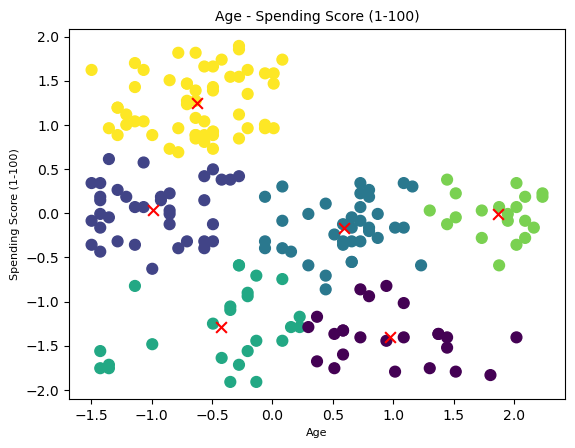

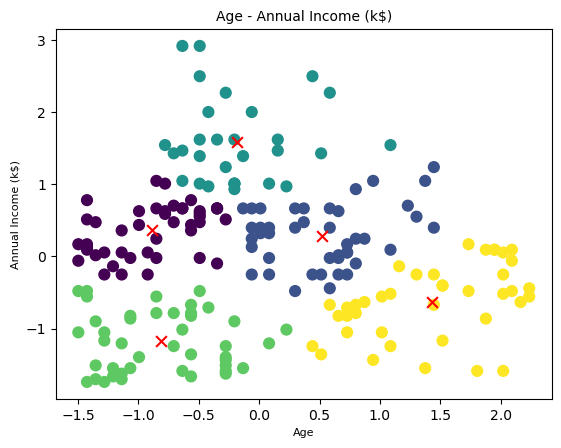

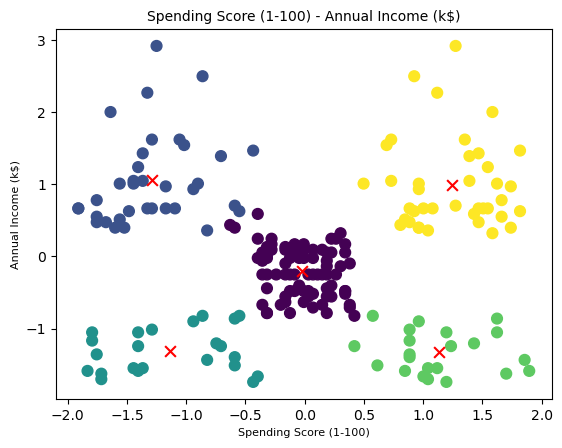

In [18]:
for i in range(len(cluster_features)):
    X = df[cluster_features[i]].values
    plt.scatter(X[:, 0], X[:, 1], s=60, c=y_KM[i], label='cluster1')
    plt.scatter(KM_center[i][:, 0], KM_center[i][:, 1], marker='x', s=60, c='red')
    plt.xlabel(cluster_features[i][0], fontsize=8)
    plt.ylabel(cluster_features[i][1], fontsize=8)
    plt.title('{} - {}'.format(cluster_features[i][0], cluster_features[i][1]), fontsize=10)
    plt.show()

<div class="h2 text-success text-center">DBSCAN</div>

In [19]:
y_DB = []
e = [0.3, 0.3, 0.3]
min_s = [3, 3, 5]
for i in range(len(cluster_features)):
    X = df[cluster_features[i]]
    DB = DBSCAN(eps=e[i], min_samples=min_s[i])
    y_DB.append(DB.fit_predict(X))

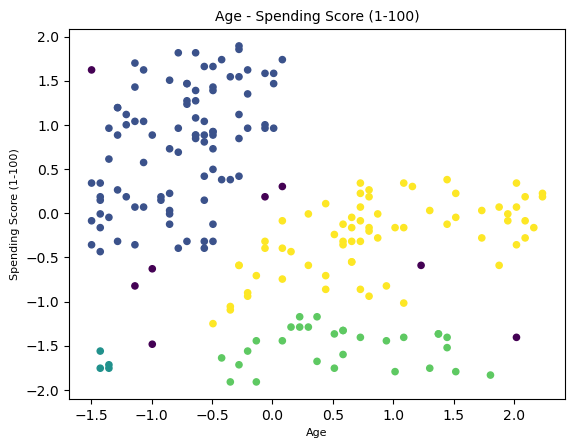

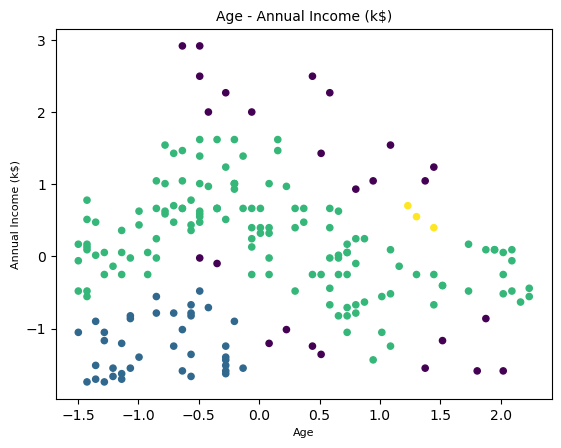

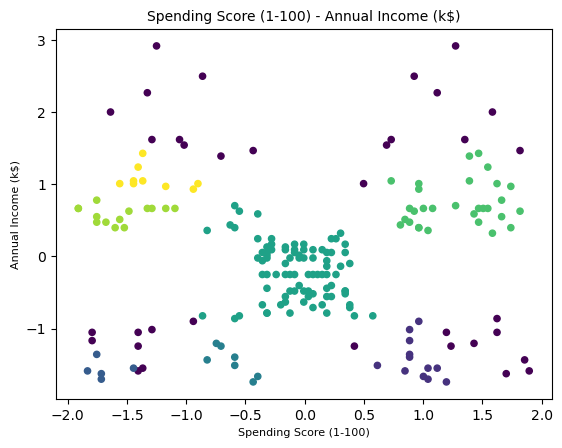

In [20]:
for i in range(len(cluster_features)):
    X = df[cluster_features[i]].values
    plt.scatter(X[:, 0], X[:, 1], s=20, c=y_DB[i])
    plt.xlabel(cluster_features[i][0], fontsize=8)
    plt.ylabel(cluster_features[i][1], fontsize=8)
    plt.title('{} - {}'.format(cluster_features[i][0], cluster_features[i][1]), fontsize=10)
    plt.show()